Sources:
https://data.humdata.org/dataset/seychelles-subnational-population-statistics
https://www.worldpop.org/geodata/summary?id=16736
https://data.humdata.org/dataset/seychelles-subnational-administrative-boundaries


                    Starting age        Duration
ECE                            4              2
Pre-primary                    4              2
Primary                        6              6
Lower secondary               12              3
Upper secondary               15              4

In [1]:
import sys, os, csv, math, statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
os.chdir("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data")  # REMOVE
if os.getcwd()!="C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Please insert the WORKING DIRECTORY
Remember to separate the backslash (for Windows) or forward slash (in Mac)
C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data
Your new path is C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298_RND_SDA\WorkFiles_Experts\298-Issue-Papers\298-Issue-Paper-Sprague\Replication files\Data


In [3]:
Seychelles = pd.read_excel("Tables\\Seychelles\\syc_admpop_nbs2019.xlsx",  sheet_name='syc_admpop_adm3_nbs2019')
Seychelles = Seychelles[['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_TYPE', 'ADM1_PCODE', 'ADM2_EN', 'ADM2_TYPE', 'ADM2_PCODE', 'ADM3_EN', 'ADM3_TYPE', 'ADM3_PCODE', 'm_0yrs2010', 'm_1yr2010', 'm_2yrs2010', 'm_3yrs2010', 'm_4yrs2010', 'm_5yrs2010', 'm_6yrs2010', 'm_7yrs2010', 'm_8yrs2010', 'm_9yrs2010', 'm_10yrs2010', 'm_11yrs2010', 'm_12yrs2010', 'm_13yrs2010', 'm_14yrs2010', 'm_15yrs2010', 'm_16yrs2010', 'm_17yrs2010', 'm_18yrs2010', 'm_19yrs2010', 'm_20yrs2010', 'm_21yrs2010', 'm_22yrs2010', 'm_23yrs2010', 'm_24yrs2010', 'm_25yrs2010', 'm_26yrs2010', 'm_27yrs2010', 'm_28yrs2010', 'm_29yrs2010', 'f_0yrs2010', 'f_1yr2010', 'f_2yrs2010', 'f_3yrs2010', 'f_4yrs2010', 'f_5yrs2010', 'f_6yrs2010', 'f_7yrs2010', 'f_8yrs2010', 'f_9yrs2010', 'f_10yrs2010', 'f_11yrs2010', 'f_12yrs2010', 'f_13yrs2010', 'f_14yrs2010', 'f_15yrs2010', 'f_16yrs2010', 'f_17yrs2010', 'f_18yrs2010', 'f_19yrs2010', 'f_20yrs2010', 'f_21yrs2010', 'f_22yrs2010', 'f_23yrs2010', 'f_24yrs2010', 'f_25yrs2010', 'f_26yrs2010', 'f_27yrs2010', 'f_28yrs2010', 'f_29yrs2010']]
Seychelles = Seychelles[Seychelles['ADM3_EN']!='Perseverance Island']
Seychelles

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_TYPE,ADM1_PCODE,ADM2_EN,ADM2_TYPE,ADM2_PCODE,ADM3_EN,ADM3_TYPE,...,f_20yrs2010,f_21yrs2010,f_22yrs2010,f_23yrs2010,f_24yrs2010,f_25yrs2010,f_26yrs2010,f_27yrs2010,f_28yrs2010,f_29yrs2010
0,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Bel Air,Distict,...,19.0,22.0,12.0,25.0,19.0,17.0,27.0,17.0,27.0,26.0
1,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,English River,Distict,...,27.0,38.0,43.0,28.0,37.0,37.0,45.0,47.0,28.0,56.0
2,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Mont Buxton,Distict,...,9.0,27.0,16.0,28.0,22.0,18.0,21.0,24.0,32.0,28.0
3,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Saint Louis,Distict,...,22.0,21.0,20.0,27.0,34.0,38.0,23.0,24.0,29.0,21.0
5,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Mont Fleuri,Distict,...,27.0,16.0,28.0,21.0,26.0,24.0,23.0,23.0,19.0,32.0
6,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Plaisance,Distict,...,29.0,30.0,33.0,38.0,27.0,21.0,27.0,25.0,41.0,36.0
7,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Les Mamelles,Distict,...,17.0,21.0,20.0,30.0,19.0,15.0,20.0,21.0,20.0,26.0
8,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Roche Caiman,Distict,...,21.0,24.0,29.0,20.0,25.0,25.0,21.0,11.0,23.0,28.0
9,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Anse Aux Pins,Distict,...,33.0,18.0,34.0,28.0,46.0,33.0,37.0,21.0,21.0,31.0
10,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Au Cap,Distict,...,27.0,25.0,28.0,28.0,29.0,29.0,41.0,26.0,27.0,33.0


In [4]:
Seychelles.to_csv('Tables\\Seychelles\\Population_Seychelles_clean.csv', index=True, header=['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_TYPE', 'ADM1_PCODE', 'ADM2_EN', 'ADM2_TYPE', 'ADM2_PCODE', 'ADM3_EN', 'ADM3_TYPE', 'ADM3_PCODE', "Male_0", "Male_1", "Male_2", "Male_3", "Male_4", "Male_5", "Male_6", "Male_7", "Male_8", "Male_9", "Male_10", "Male_11", "Male_12", "Male_13", "Male_14", "Male_15", "Male_16", "Male_17", "Male_18", "Male_19", "Male_20", "Male_21", "Male_22", "Male_23", "Male_24", "Male_25", "Male_26", "Male_27", "Male_28", "Male_29", "Female_0", "Female_1", "Female_2", "Female_3", "Female_4", "Female_5", "Female_6", "Female_7", "Female_8", "Female_9", "Female_10", "Female_11", "Female_12", "Female_13", "Female_14", "Female_15", "Female_16", "Female_17", "Female_18", "Female_19", "Female_20", "Female_21", "Female_22", "Female_23", "Female_24", "Female_25", "Female_26", "Female_27", "Female_28", "Female_29"])

In [5]:
CensusData = pd.read_csv("Tables\\Seychelles\\Population_Seychelles_clean.csv")

# ECE (Starting age: 3 years old - Duration: 3 years)
#CensusData['CD_ECE_Female'] = CensusData['Female_3'] + CensusData['Female_4'] + CensusData['Female_5'] 
#CensusData['CD_ECE_Male'] = CensusData['Male_3'] + CensusData['Male_4'] + CensusData['Male_5']
#CensusData['CD_ECE'] = CensusData['CD_ECE_Female'] + CensusData['CD_ECE_Male']

# Pre-primary (Starting age: 4 years old - Duration: 2 years)
CensusData['CD_PrePrimary_Female'] = CensusData['Female_4'] + CensusData['Female_5'] 
CensusData['CD_PrePrimary_Male'] = CensusData['Male_4'] + CensusData['Male_5']
CensusData['CD_PrePrimary'] = CensusData['CD_PrePrimary_Female'] + CensusData['CD_PrePrimary_Male']

# Primary (Starting age: 6 years old - Duration: 6 years)
CensusData['CD_Primary_Female'] = CensusData['Female_6'] + CensusData['Female_7'] + CensusData['Female_8'] + CensusData['Female_9'] + CensusData['Female_10'] + CensusData['Female_11']
CensusData['CD_Primary_Male'] = CensusData['Male_6'] + CensusData['Male_7'] + CensusData['Male_8'] + CensusData['Male_9'] + CensusData['Male_10'] + CensusData['Male_11']
CensusData['CD_Primary'] = CensusData['CD_Primary_Female'] + CensusData['CD_Primary_Male']

# Lower secondary (Starting age: 12 years old - Duration: 3 years)
CensusData['CD_LowSec_Female'] = CensusData['Female_12'] + CensusData['Female_13'] + CensusData['Female_14'] 
CensusData['CD_LowSec_Male'] = CensusData['Male_12'] + CensusData['Male_13'] + CensusData['Male_14']
CensusData['CD_LowSec'] = CensusData['CD_LowSec_Female'] + CensusData['CD_LowSec_Male']

# Upper secondary (Starting age: 15 years old - Duration: 3 years)
CensusData['CD_UppSec_Female'] = CensusData['Female_15'] + CensusData['Female_16'] + CensusData['Female_17'] + CensusData['Female_18'] 
CensusData['CD_UppSec_Male'] = CensusData['Male_15'] + CensusData['Male_16'] + CensusData['Male_17'] + CensusData['Male_18'] 
CensusData['CD_UppSec'] = CensusData['CD_UppSec_Female'] + CensusData['CD_UppSec_Male']

In [6]:
PopulationEstimates = pd.read_csv("Raster data\\Seychelles\\Population_estimates_syc2019SchoolAge.csv", usecols=['ADM3_PCODE', 'Area', 'Pre_primary_F', 'Pre_primary_M', 'Pre_primary_T', 'Primary_F', 'Primary_M', 'Primary_T', 'LowSec_F', 'LowSec_M', 'LowSec_T', 'UppSec_F', 'UppSec_M', 'UppSec_T'])
PopulationEstimates = PopulationEstimates.rename(columns={'Pre_primary_F': 'PE_PrePrimary_Female', 'Pre_primary_M': 'PE_PrePrimary_Male', 'Pre_primary_T': 'PE_PrePrimary', 'Primary_F': 'PE_Primary_Female', 'Primary_M': 'PE_Primary_Male', 'Primary_T': 'PE_Primary', 'LowSec_F': 'PE_LowSec_Female', 'LowSec_M': 'PE_LowSec_Male', 'LowSec_T': 'PE_LowSec', 'UppSec_F': 'PE_UppSec_Female', 'UppSec_M': 'PE_UppSec_Male', 'UppSec_T': 'PE_UppSec'} )


In [7]:
MergedData = pd.merge(CensusData, PopulationEstimates, how='inner', on='ADM3_PCODE')
MergedData = MergedData[['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_TYPE', 'ADM1_PCODE', 'ADM2_EN', 'ADM2_TYPE', 'ADM2_PCODE', 'ADM3_EN', 'ADM3_TYPE', 'ADM3_PCODE', 'PE_PrePrimary_Female', 'PE_PrePrimary_Male', 'PE_PrePrimary', 'PE_Primary_Female', 'PE_Primary_Male', 'PE_Primary', 'PE_LowSec_Female', 'PE_LowSec_Male', 'PE_LowSec', 'PE_UppSec_Female', 'PE_UppSec_Male', 'PE_UppSec', 'CD_PrePrimary_Female', 'CD_PrePrimary_Male', 'CD_PrePrimary', 'CD_Primary_Female', 'CD_Primary_Male', 'CD_Primary', 'CD_LowSec_Female', 'CD_LowSec_Male', 'CD_LowSec', 'CD_UppSec_Female', 'CD_UppSec_Male', 'CD_UppSec', 'Area']]
MergedData

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_TYPE,ADM1_PCODE,ADM2_EN,ADM2_TYPE,ADM2_PCODE,ADM3_EN,ADM3_TYPE,...,CD_Primary_Female,CD_Primary_Male,CD_Primary,CD_LowSec_Female,CD_LowSec_Male,CD_LowSec,CD_UppSec_Female,CD_UppSec_Male,CD_UppSec,Area
0,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Bel Air,Distict,...,132.0,111.0,243.0,52.0,60.0,112.0,93.0,87.0,180.0,444.412909
1,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,English River,Distict,...,199.0,171.0,370.0,79.0,88.0,167.0,114.0,119.0,233.0,138.208017
2,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Mont Buxton,Distict,...,122.0,141.0,263.0,67.0,67.0,134.0,104.0,106.0,210.0,116.435791
3,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Saint Louis,Distict,...,136.0,133.0,269.0,56.0,68.0,124.0,96.0,97.0,193.0,138.079797
4,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Mont Fleuri,Distict,...,153.0,158.0,311.0,65.0,87.0,152.0,105.0,116.0,221.0,561.254959
5,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Plaisance,Distict,...,172.0,161.0,333.0,89.0,76.0,165.0,117.0,124.0,241.0,337.029030
6,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Les Mamelles,Distict,...,113.0,137.0,250.0,79.0,61.0,140.0,83.0,92.0,175.0,166.818059
7,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Roche Caiman,Distict,...,121.0,114.0,235.0,67.0,62.0,129.0,108.0,105.0,213.0,154.692230
8,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Anse Aux Pins,Distict,...,157.0,161.0,318.0,94.0,106.0,200.0,142.0,126.0,268.0,245.691789
9,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Au Cap,Distict,...,153.0,188.0,341.0,98.0,119.0,217.0,144.0,173.0,317.0,827.270929


In [8]:
Levels = ['PrePrimary', 'Primary', 'LowSec', 'UppSec']

for x in range(len(Levels)):
    MergedData['Dif_'+Levels[x]] = MergedData['PE_'+Levels[x]] - MergedData['CD_'+Levels[x]]
    MergedData['Dif_'+Levels[x]+'_std'] = (MergedData['Dif_'+Levels[x]] - MergedData['Dif_'+Levels[x]].mean())/MergedData['Dif_'+Levels[x]].std()
    MergedData['PE_'+Levels[x]+'_std'] = (MergedData['PE_'+Levels[x]] - MergedData['PE_'+Levels[x]].mean())/MergedData['PE_'+Levels[x]].std()
    MergedData['CD_'+Levels[x]+'_std'] = (MergedData['CD_'+Levels[x]] - MergedData['CD_'+Levels[x]].mean())/MergedData['CD_'+Levels[x]].std()
MergedData

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_TYPE,ADM1_PCODE,ADM2_EN,ADM2_TYPE,ADM2_PCODE,ADM3_EN,ADM3_TYPE,...,PE_Primary_std,CD_Primary_std,Dif_LowSec,Dif_LowSec_std,PE_LowSec_std,CD_LowSec_std,Dif_UppSec,Dif_UppSec_std,PE_UppSec_std,CD_UppSec_std
0,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Bel Air,Distict,...,-1.006461,-0.797602,-15.096289,0.241847,-1.006461,-1.017376,-63.084230,-0.042471,-1.006461,-0.707167
1,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,English River,Distict,...,0.211936,0.828128,-20.653144,0.033972,0.211936,0.165427,-56.430339,0.103863,0.211936,0.084446
2,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Mont Buxton,Distict,...,-0.394964,-0.541582,-12.281415,0.347147,-0.394964,-0.544255,-63.144716,-0.043801,-0.394964,-0.259084
3,Seychelles,SC,Mahe,Islands,SC1,Central 1 Mahe,Region,SC11,Saint Louis,Distict,...,-0.333891,-0.464776,0.196941,0.813945,-0.333891,-0.759310,-43.154541,0.395828,-0.333891,-0.512998
4,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Mont Fleuri,Distict,...,-1.114961,0.072867,-59.499267,-1.419208,-1.114961,-0.157156,-109.396489,-1.060981,-1.114961,-0.094787
5,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Plaisance,Distict,...,0.710569,0.354490,1.581637,0.865745,0.710569,0.122416,-40.016775,0.464835,0.710569,0.203935
6,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Les Mamelles,Distict,...,-0.485379,-0.707995,-21.950502,-0.014560,-0.485379,-0.415222,-32.571523,0.628572,-0.485379,-0.781847
7,Seychelles,SC,Mahe,Islands,SC1,Central 2 Mahe,Region,SC12,Roche Caiman,Distict,...,-0.993864,-0.900010,-31.585092,-0.374977,-0.993864,-0.651783,-95.467464,-0.754651,-0.993864,-0.214276
8,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Anse Aux Pins,Distict,...,0.383105,0.162475,-46.707009,-0.940667,0.383105,0.875109,-83.049723,-0.481557,0.383105,0.607210
9,Seychelles,SC,Mahe,Islands,SC1,East Mahe,Region,SC13,Au Cap,Distict,...,1.823607,0.456898,-5.250719,0.610156,1.823607,1.240703,-61.521340,-0.008099,1.823607,1.339079


Pre-primary


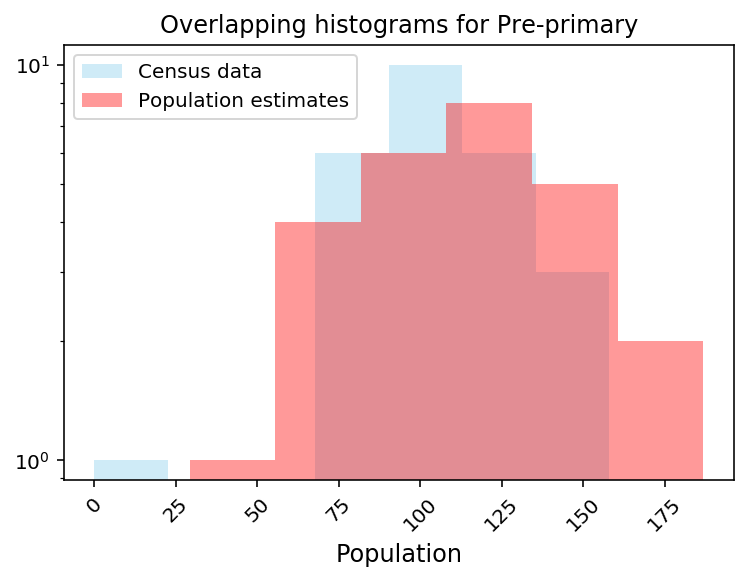

Primary


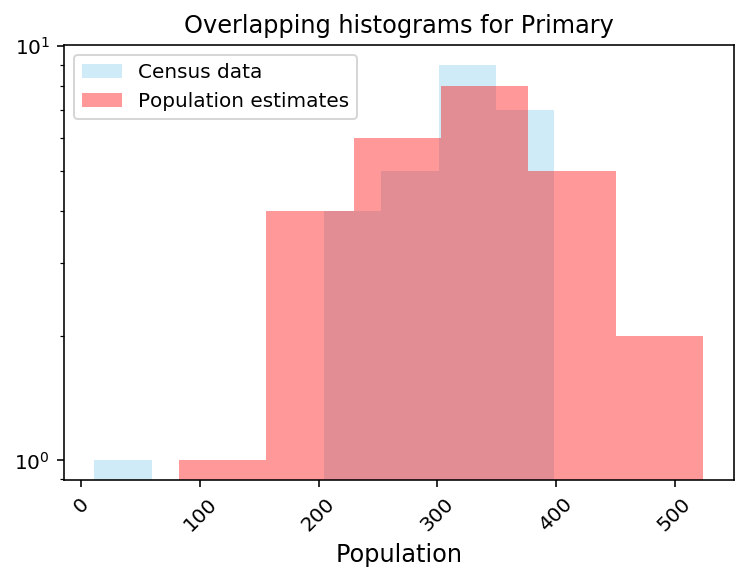

Lower secondary


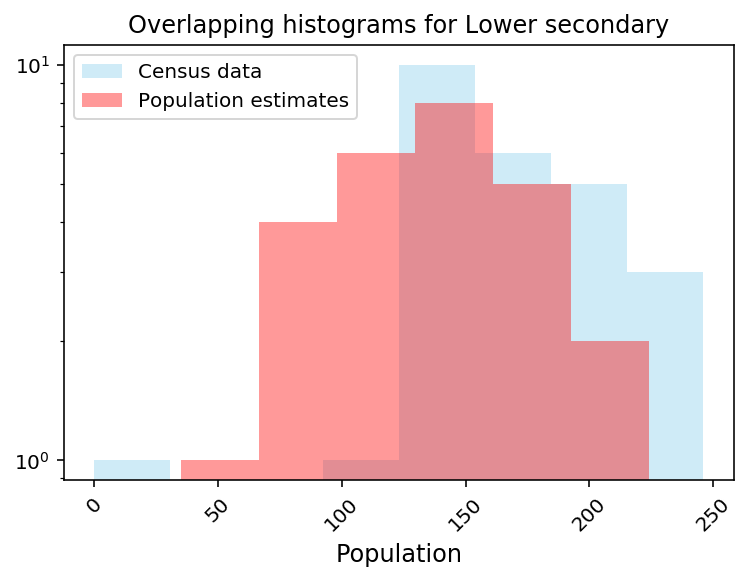

Upper secondary


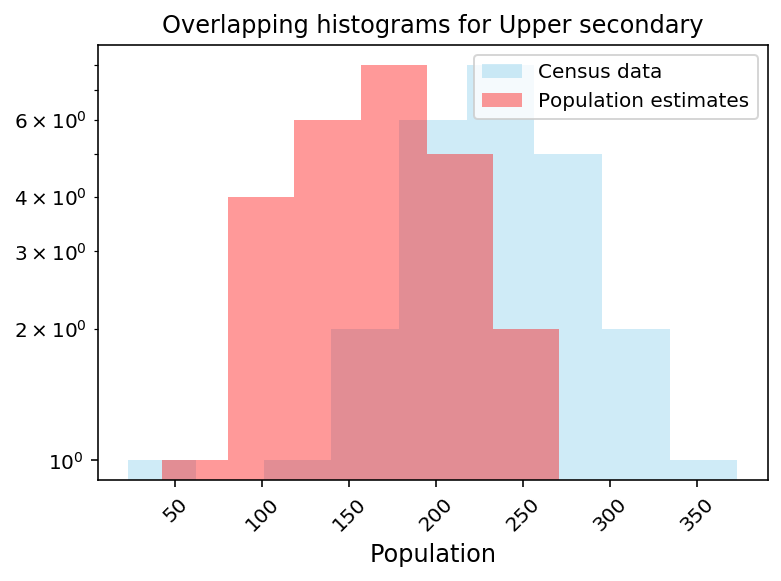

In [9]:
bars = ['Pre-primary', 'Primary', 'Lower secondary', 'Upper secondary']
for x in range(len(Levels)):
    print(bars[x])
    sns.distplot( MergedData["CD_"+Levels[x]] , color="skyblue", label="Census data", hist=True, kde=False, rug=False)
    sns.distplot( MergedData["PE_"+Levels[x]] , color="red", label="Population estimates", hist=True, kde=False, rug=False)
    plt.xlabel('Population', color = 'black', fontsize='12')
    plt.title("Overlapping histograms for " + bars[x])
    plt.legend()
    plt.xticks(color='black', rotation=45)
    plt.yscale('log')
    plt.show()


Pre-primary


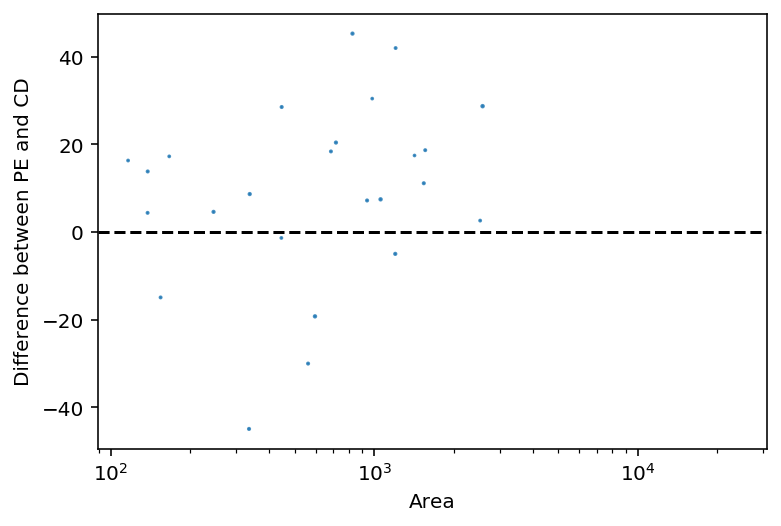

Primary


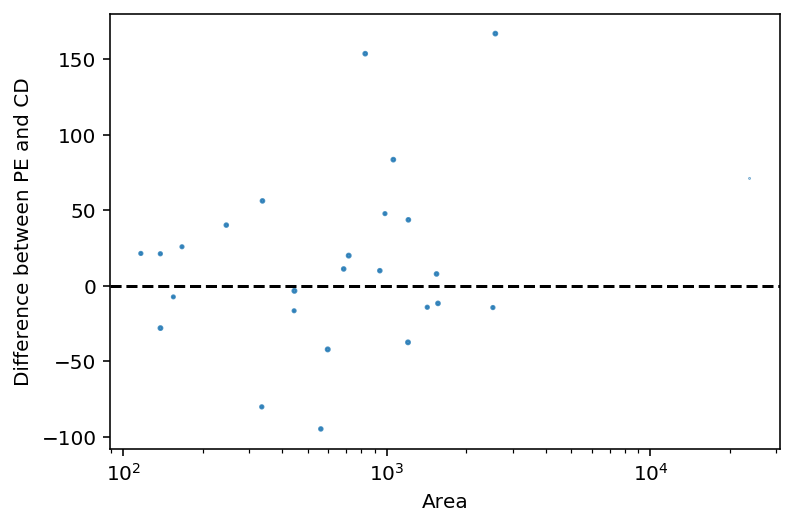

Lower secondary


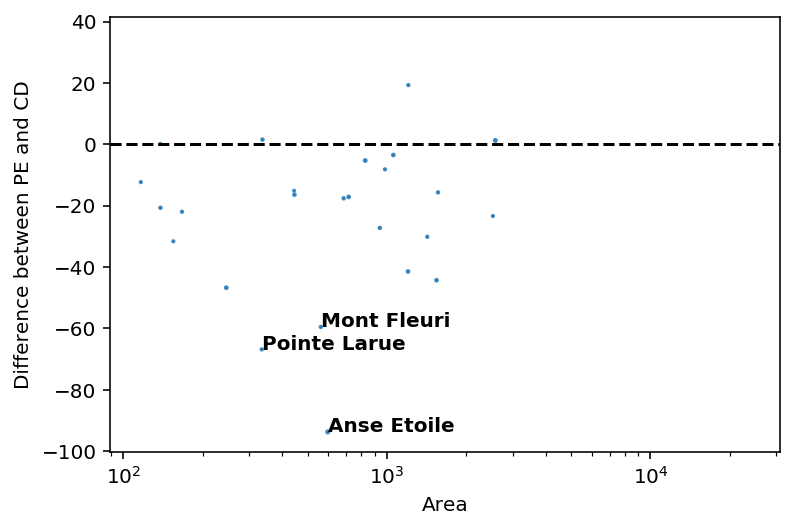

Upper secondary


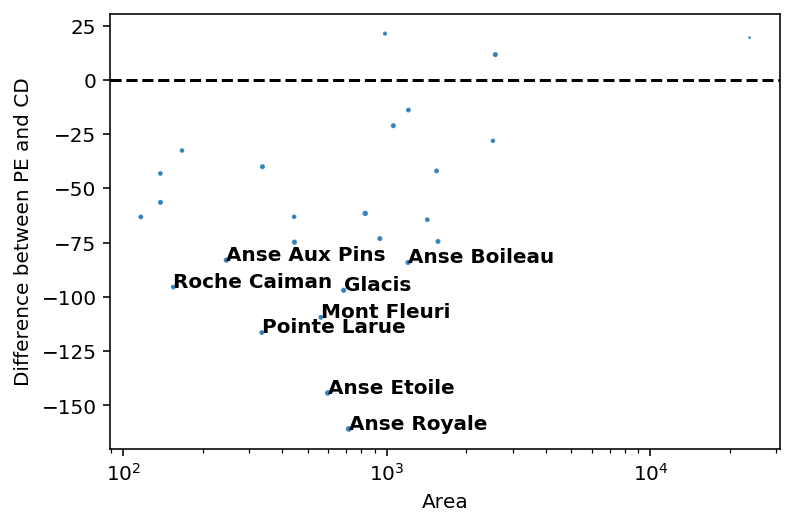

In [10]:
for x in range(len(Levels)):
    MergedData['Label_'+Levels[x]] = np.where(MergedData['Dif_'+Levels[x]]>=MergedData['Dif_'+Levels[x]].mean()+3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM3_EN'],
                                              np.where(MergedData['Dif_'+Levels[x]]<=-MergedData['Dif_'+Levels[x]].mean()-3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM3_EN'], ''))
    print(bars[x])
    p1 = sns.regplot(x=MergedData['Area'], y=MergedData['Dif_'+Levels[x]], scatter_kws={'s':MergedData['CD_'+Levels[x]]/100}, fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['Area'][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

In [11]:
Results = {}
for x in range(len(Levels)):
    formula = "PE_"+Levels[x]+"_std ~ CD_"+Levels[x]+"_std"
    result = sm.ols(formula=formula, data=MergedData).fit()
    heteroscedasticity_test = diag.het_breuschpagan(result.resid, result.model.exog)
    if heteroscedasticity_test[-1] <= 0.05:
        # The hypothesis that the error variance does not depend on x is rejected. There exists heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit(cov_type='HC0')
        print("Robust regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'Yes'}
    else:
        # The hypothesis that the error variance does not depend on x is kept. There is no heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit()
        print("Regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue[0][0]))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'No'}


Regression results for Pre-primary

                            OLS Regression Results                            
Dep. Variable:      PE_PrePrimary_std   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     42.20
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.02e-06
Time:                        15:41:21   Log-Likelihood:                -23.193
No. Observations:                  26   AIC:                             50.39
Df Residuals:                      24   BIC:                             52.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
In

In [12]:
Results = pd.DataFrame.from_dict(Results)
Results = Results.transpose()
Results['ConfidenceInterval'] = 1.98*Results['Std']
Results['Color'] = np.where(Results['Robust']=='Yes','lightblue','darkolivegreen')
Results = Results.transpose()
Results

,PrePrimary,Primary,LowSec,UppSec
Coefficient,0.798398,0.781199,0.819937,0.734002
Std,0.122909,0.127431,0.116852,0.13863
t_test,-1.64025,-1.71701,-1.54096,-1.91876
p_value,0.11399622252563277,0.09885675310416411,0.1364104114082265,0.06698433491102214
R_square,0.63744,0.610272,0.672296,0.538759
Robust,No,No,No,No
ConfidenceInterval,0.24336,0.252313,0.231366,0.274488
Color,darkolivegreen,darkolivegreen,darkolivegreen,darkolivegreen


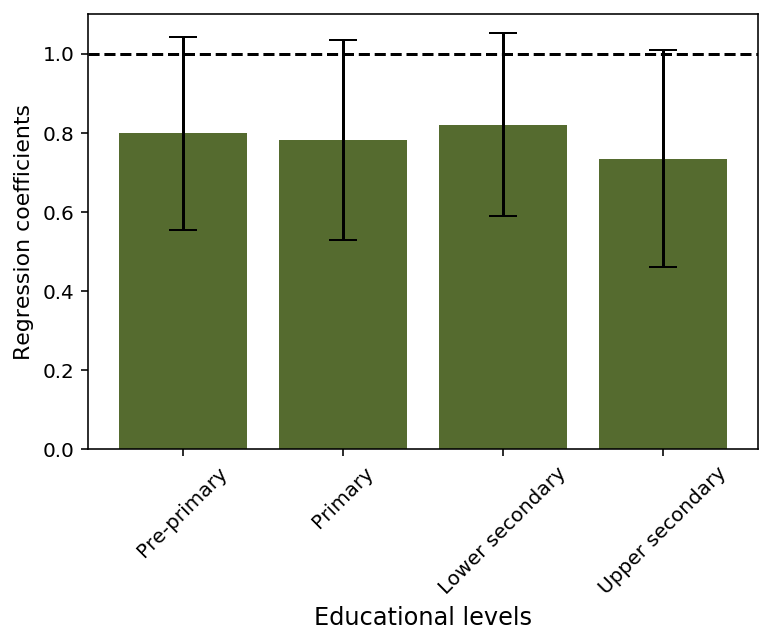

In [13]:
height = list(Results.loc['Coefficient'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
yer1 = list(Results.loc['ConfidenceInterval'])
plt.bar(y_pos, height, yerr=yer1, capsize=7, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('Regression coefficients', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0,1.1)
plt.show()

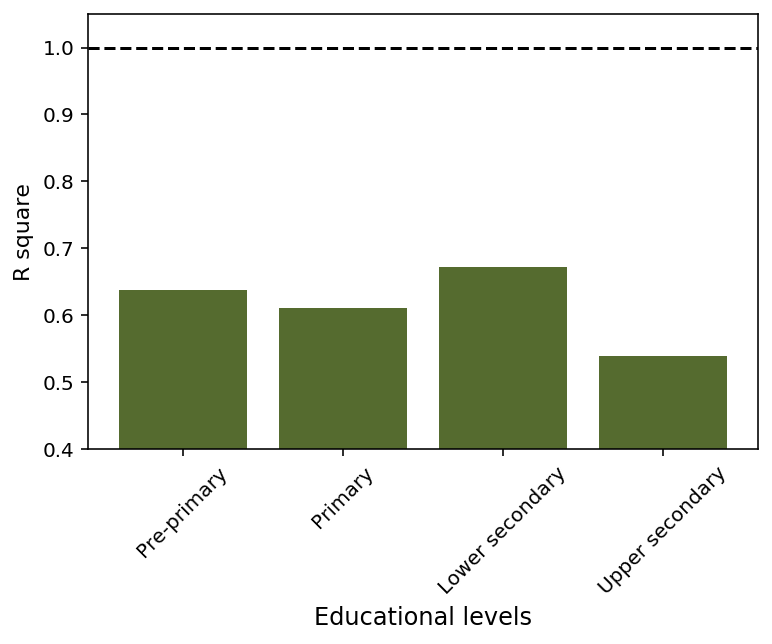

In [14]:
height = list(Results.loc['R_square'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('R square', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.4,1.05)
plt.show()

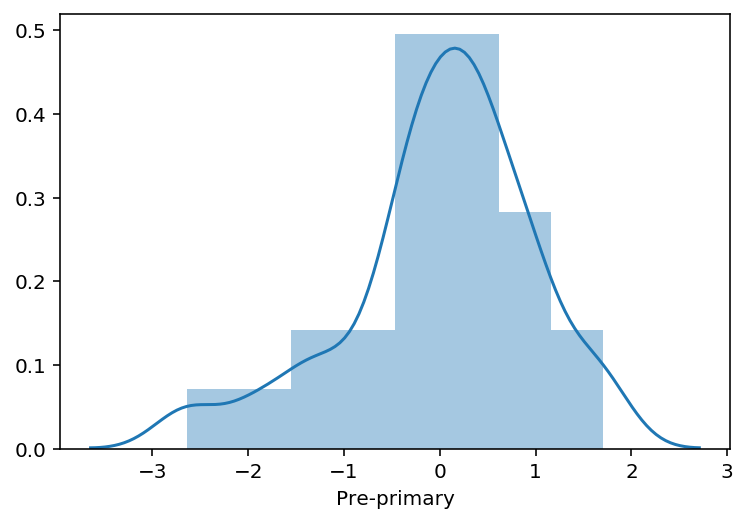

The difference between the Population estimates and the
Census data is normally distributed for Pre-primary


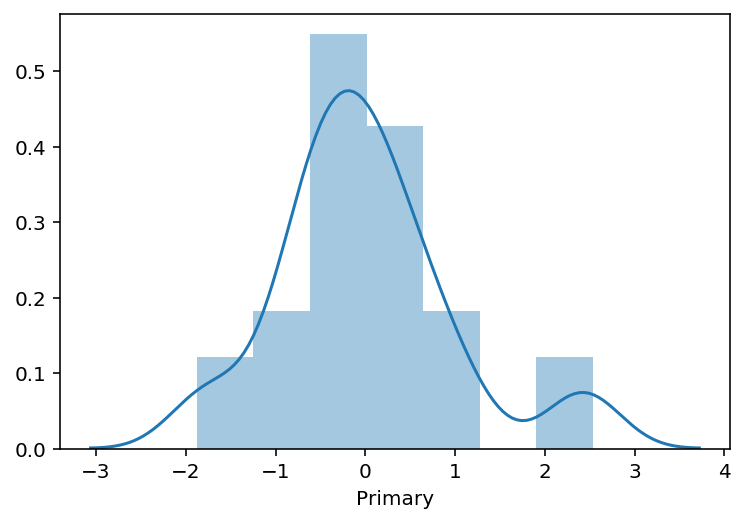

The difference between the Population estimates and the
Census data is normally distributed for Primary


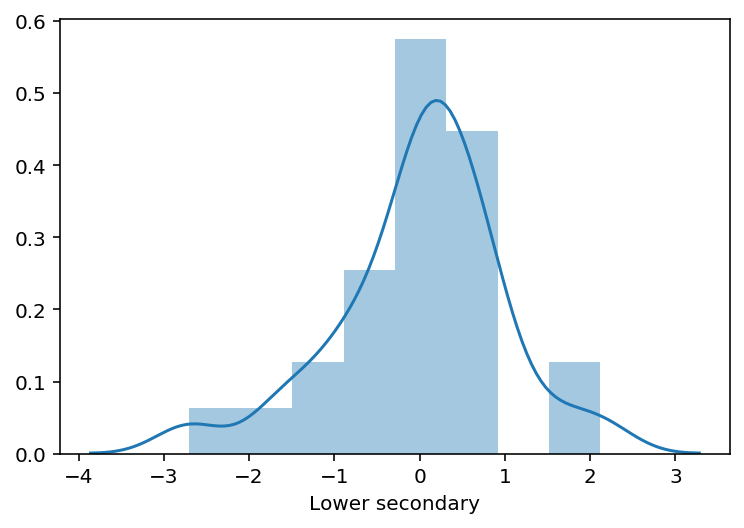

The difference between the Population estimates and the
Census data is normally distributed for Lower secondary


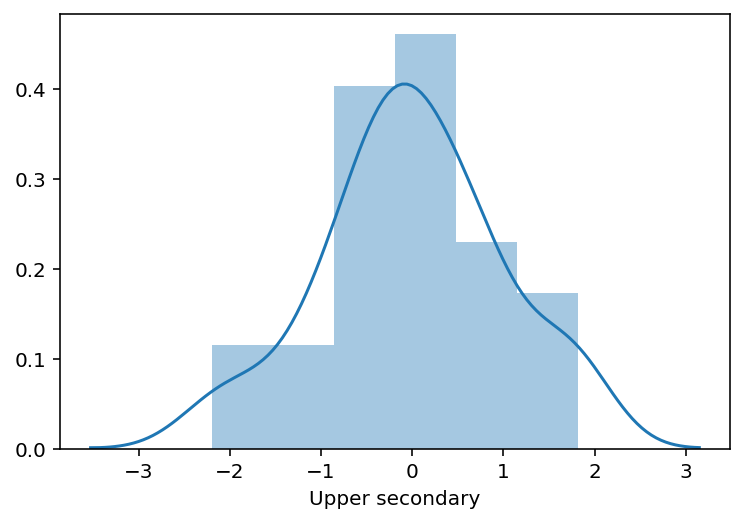

The difference between the Population estimates and the
Census data is normally distributed for Upper secondary


In [15]:
for x in range(len(Levels)):
    sns.distplot( MergedData["Dif_"+Levels[x]+"_std"])
    plt.xlabel(bars[x])
    plt.show()
    jbt = jarque_bera(MergedData["Dif_"+Levels[x]+"_std"])
    if jbt[1]>0.05:
        print("The difference between the Population estimates and the")
        print("Census data is normally distributed for "+bars[x])
    else:
        print("The difference between the Population estimates and the")
        print("Census data is not normally distributed for "+bars[x])

Pre-primary


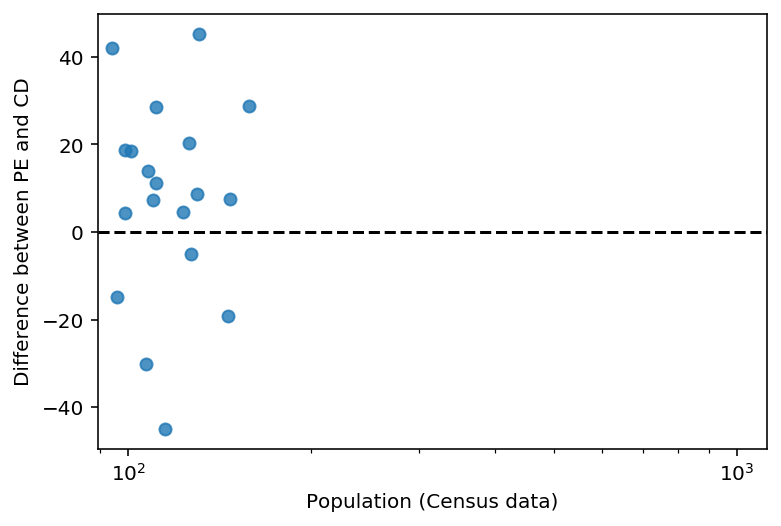

Primary


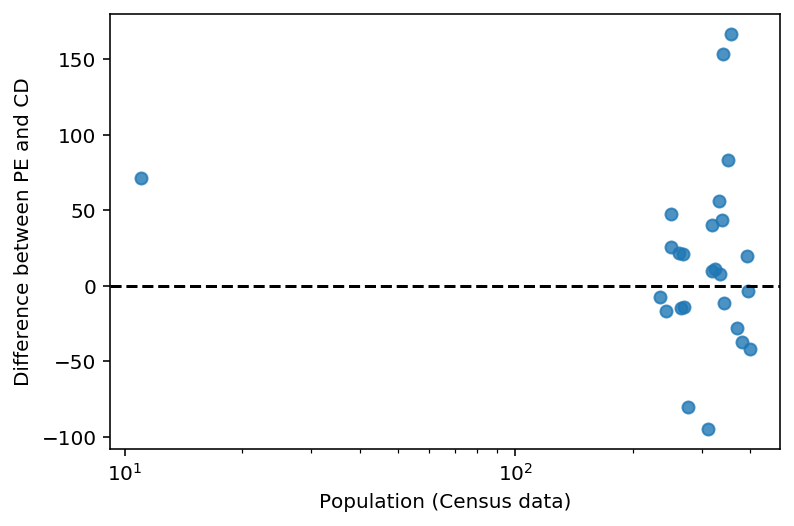

Lower secondary


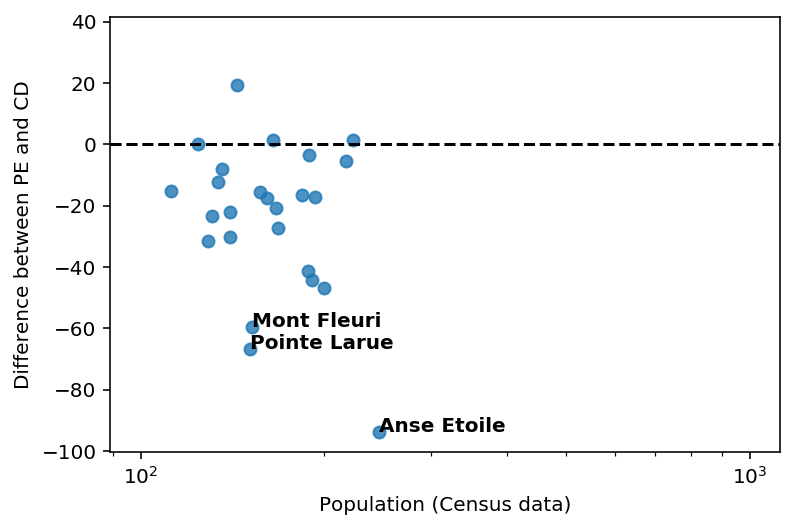

Upper secondary


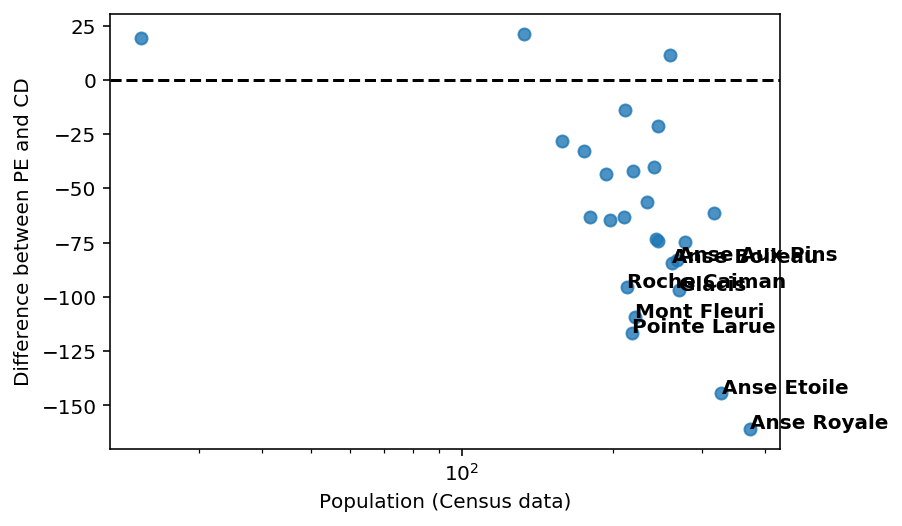

In [16]:
for x in range(len(Levels)):
    print(bars[x])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Dif_'+Levels[x]], fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

Pre-primary


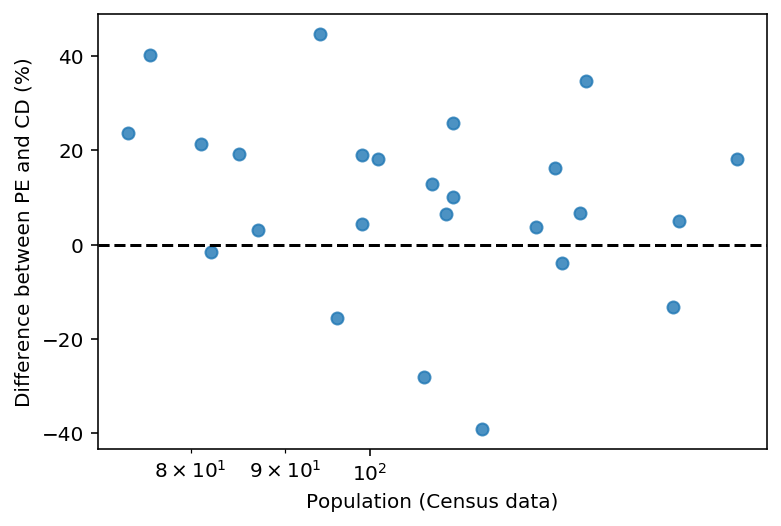

Primary


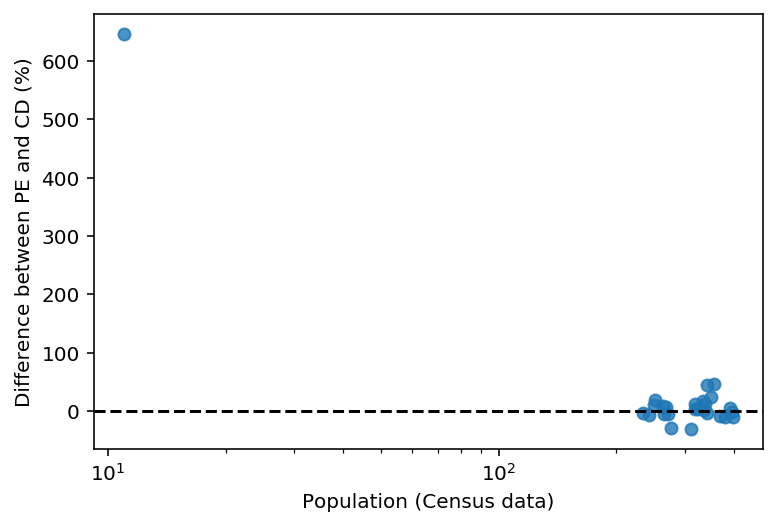

Lower secondary


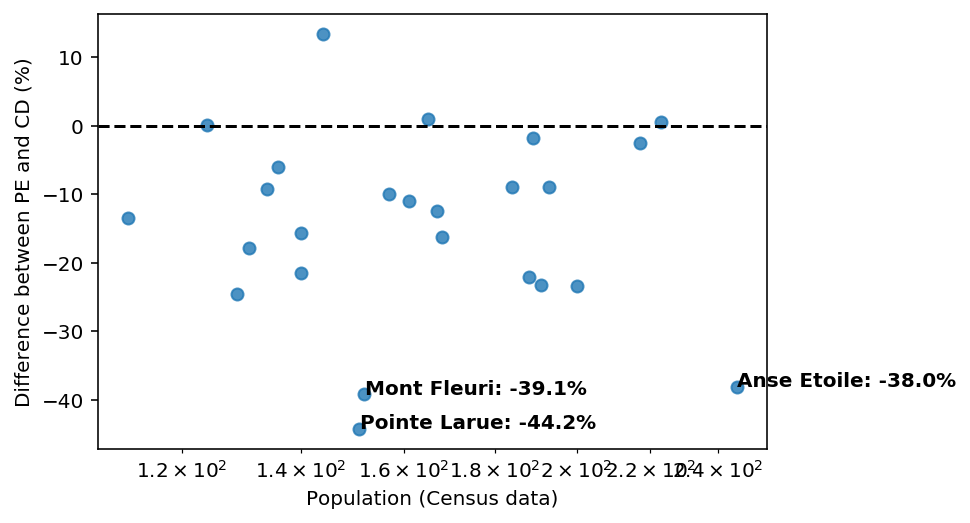

Upper secondary


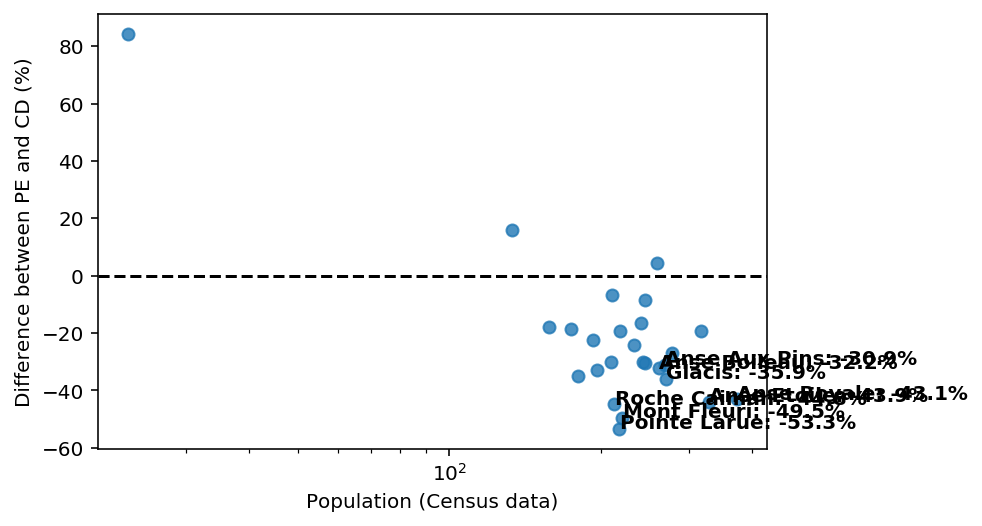

In [17]:
for x in range(len(Levels)):
    print(bars[x])
    MergedData['Perc_Dif_'+Levels[x]] = MergedData['Dif_'+Levels[x]]/MergedData['CD_'+Levels[x]]*100
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Perc_Dif_'+Levels[x]], fit_reg=False)
    for line in range(0,MergedData.shape[0]):
        if MergedData['Label_'+Levels[x]][line]!='':
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line]+': '+str(MergedData['Perc_Dif_'+Levels[x]][line])[:5]+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
        else:
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD (%)')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()